In [20]:
import pandas as pd
from collections import defaultdict

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

pylab.rcParams['figure.figsize'] = (20, 10)

plt.subplots_adjust(top=0.9)

folder = '/home/jgf/git/Empirical/examples/evo/concept/nomap'

num_reps = 10

base_template = "{tlf}/{treat}/{parb}{paropt}/{struct}-{rep}-quorum.csv"

options = [15]

treatment = { "disabled":"grid-pools-disabled-bottleneck", "enabled":"grid-pools-infinite-private-pts"}

loaded_replicants = []
loaded_parent = []
loaded_base = []
loaded_children = []

parent_base = 'SUBGRID_SIZE_'
structure = ['grid-pools-quorum.out']

for parent in options:
    for key in treatment:
        for replicant in range(0,num_reps):
            try:
                loaded = pd.read_csv(base_template.format(tlf=folder,
                                                          parb=parent_base,
                                                          paropt=parent,
                                                          struct=structure[0],
                                                          rep=replicant,
                                                          treat=treatment[key]), sep=' ')
            except Exception as err:
                print("Apparently there isn't anything in there")
                print(base_template.format(tlf=folder,
                                          parb=parent_base,
                                          paropt=parent,
                                          struct=structure[0],
                                          rep=replicant,
                                          treat=treatment[key]))
                continue

            loaded['replicant'] = replicant
            loaded['treatment'] = "{}-{}".format(parent, key)
            loaded_children.append(loaded)
        loaded_parent = pd.concat(loaded_children)
        loaded_parent['Subgrid Size'] = parent
        loaded_children = []
        loaded_base.append(loaded_parent)

squished_base = pd.concat(loaded_base)
squished_base = squished_base.drop_duplicates()
squished_base.head()

Populating the interactive namespace from numpy and matplotlib


,update,avg_age,max_age,avg_coop,avg_points,percentlying_defector,percentdonator,grid_usage,available_private_pts,replicant,treatment,Subgrid Size
0,0,0.00000,0,1.000000,0.0,0,1,0.060000,75000.0,0,15-disabled,15
1,10,10.00000,10,1.000000,10.0,0,1,0.060000,100000000.0,0,15-disabled,15
2,20,20.00000,20,1.000000,20.0,0,1,0.060000,100000000.0,0,15-disabled,15
3,30,7.23853,8,0.997969,7.0,0,1,0.113542,100000000.0,0,15-disabled,15
4,40,17.23850,18,0.997969,17.0,0,1,0.113542,100000000.0,0,15-disabled,15


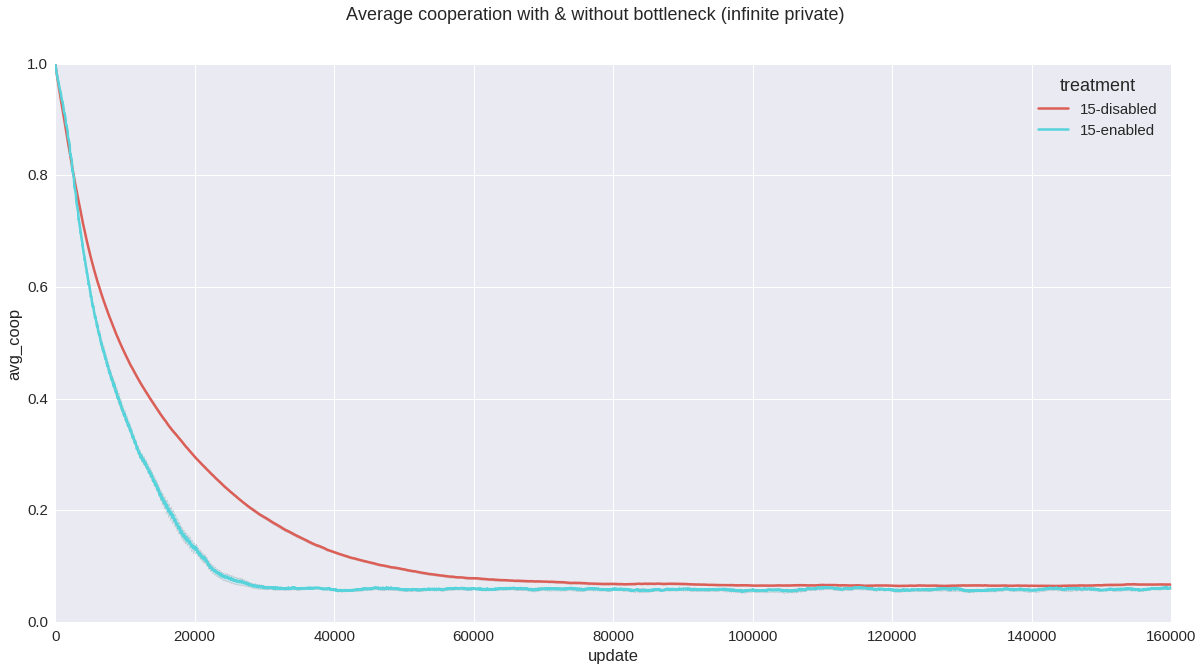

In [21]:
sns.plt.suptitle("Average cooperation with & without bottleneck (infinite private)")
ax = sns.tsplot( time="update", value="avg_coop", unit="replicant", 
    condition="treatment", ci=95, data=squished_base, color="hls")
#squished_base[ (squished_base['replicant'] == 5) &  (squished_base["Subgrid Size"] == 10) & (squished_base['update'] == 10)]

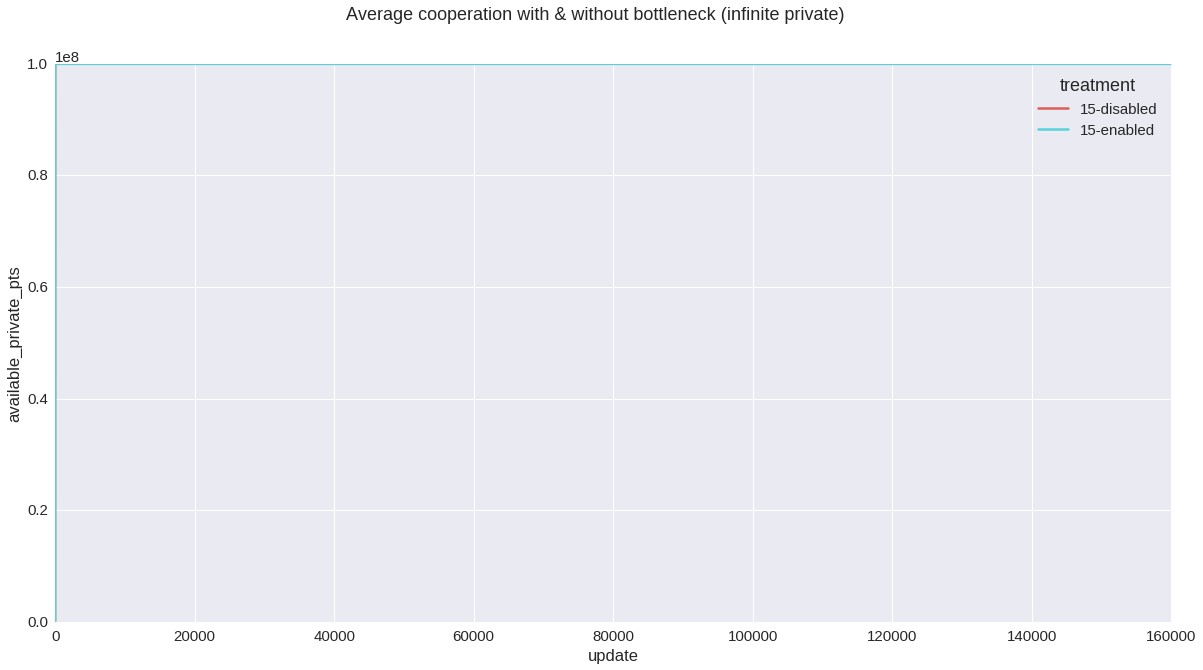

In [22]:
sns.plt.suptitle("Average cooperation with & without bottleneck (infinite private)")
ax = sns.tsplot( time="update", value="available_private_pts", unit="replicant", 
    condition="treatment", ci=95, data=squished_base, color="hls")
#squished_base[ (squished_base['replicant'] == 5) &  (squished_base["Subgrid Size"] == 10) & (squished_base['update'] == 10)]

In [23]:
import pandas as pd
from collections import defaultdict

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

pylab.rcParams['figure.figsize'] = (20, 10)

plt.subplots_adjust(top=0.9)

folder = '/home/jgf/git/Empirical/examples/evo/concept/nomap'

num_reps = 10

base_template = "{tlf}/{treat}/{parb}{paropt}/{struct}-{rep}-quorum.csv"

options = [15]

treatment = { "limited resources":"grid-pools-subgrid-size-sweep", "infinite resources":"grid-pools-infinite-private-pts"}

loaded_replicants = []
loaded_parent = []
loaded_base = []
loaded_children = []

parent_base = 'SUBGRID_SIZE_'
structure = ['grid-pools-quorum.out']

for parent in options:
    for key in treatment:
        for replicant in range(0,num_reps):
            try:
                loaded = pd.read_csv(base_template.format(tlf=folder,
                                                          parb=parent_base,
                                                          paropt=parent,
                                                          struct=structure[0],
                                                          rep=replicant,
                                                          treat=treatment[key]), sep=' ')
            except Exception as err:
                print("Apparently there isn't anything in there")
                print(base_template.format(tlf=folder,
                                          parb=parent_base,
                                          paropt=parent,
                                          struct=structure[0],
                                          rep=replicant,
                                          treat=treatment[key]))
                continue

            loaded['replicant'] = replicant
            loaded['treatment'] = "{}-{}".format(parent, key)
            loaded_children.append(loaded)
        loaded_parent = pd.concat(loaded_children)
        loaded_parent['Subgrid Size'] = parent
        loaded_children = []
        loaded_base.append(loaded_parent)

squished_base = pd.concat(loaded_base)
squished_base = squished_base.drop_duplicates()
squished_base.head()

Populating the interactive namespace from numpy and matplotlib


,update,avg_age,max_age,avg_coop,avg_points,percentlying_defector,percentdonator,grid_usage,available_private_pts,replicant,treatment,Subgrid Size
0,0,0.00000,0,1.000000,0.0,0,1,0.060000,180000.0,0,15-infinite resources,15
1,10,10.00000,10,1.000000,10.0,0,1,0.060000,100000000.0,0,15-infinite resources,15
2,20,20.00000,20,1.000000,20.0,0,1,0.060000,100000000.0,0,15-infinite resources,15
3,30,7.22908,8,0.997669,7.0,0,1,0.113681,100000000.0,0,15-infinite resources,15
4,40,17.22910,18,0.997669,17.0,0,1,0.113681,100000000.0,0,15-infinite resources,15


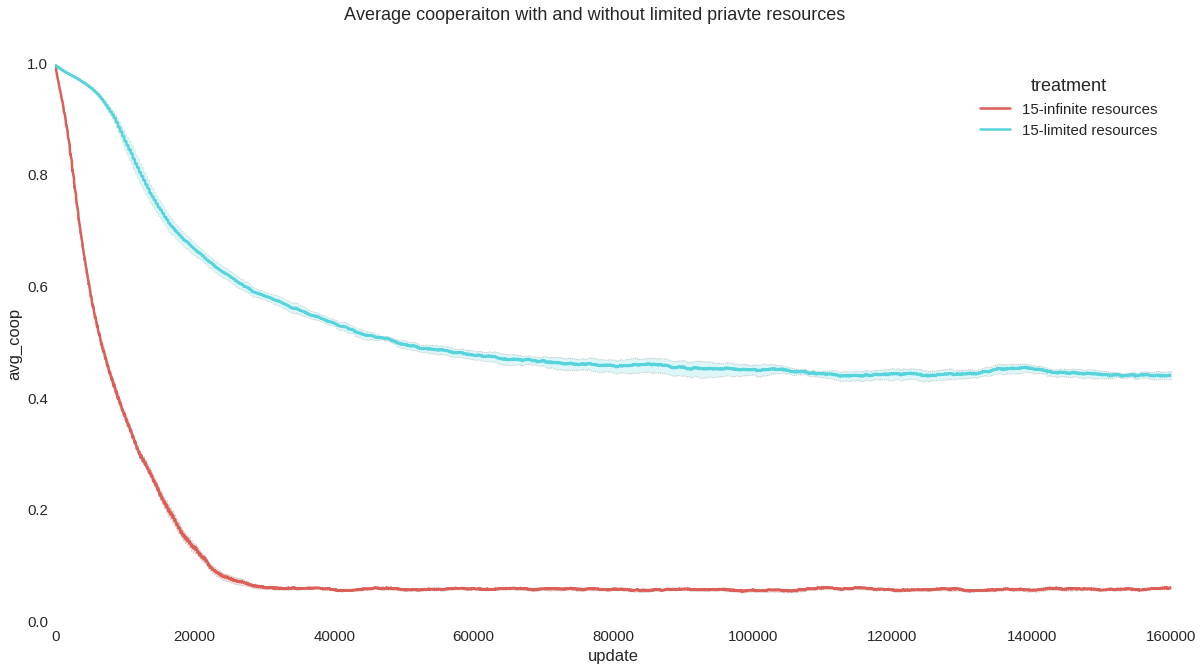

In [24]:
sns.plt.suptitle("Average cooperaiton with and without limited priavte resources")
ax = sns.tsplot( time="update", value="avg_coop", unit="replicant", 
    condition="treatment", ci=95, data=squished_base, color="hls")
ax.patch.set_visible(False)
#squished_base[ (squished_base['replicant'] == 5) &  (squished_base["Subgrid Size"] == 10) & (squished_base['update'] == 10)]